# **User Ratings-Based Recommendation System (Collaborative Filtering)** 
  > *Author - Ryan Tan Kang Khen (193190N)*

# **Section 0 – Introduction**
- ***Explain the Machine Learning problem that you are trying to solve very briefly in your JupyterNotebook***
>For this Jupyter Notebook , I want to recommend different bakeries 
and baked goods to different users based on different ratings that they have given. 

  >Normally, after a user gave a bakery a certain rating, the user has a hard time choosing a new bakery to try. So this JuyterNotebook aims to provide recommendations of different bakeries and different baked goods to users based on their own ratings.

  >We will be using 2 different methods for this Jupyter Notebook: low Rank Matrix Factorization and Singular-Value Decomposition (SVN). 

# **Section 1 – Data Collection**
-  ***Describe your data source - where you got the data from (downloaded as a complete dataset online, or put together by yourself from various sources)***
  >Since there were insufficient data on bakeries, I decided to scout around the Internet for existing bakeries data and even restaurants data. After looking around for a week, I found 3 Kaggle Datasets can be useful to combine with each other. 
  1. https://www.kaggle.com/uciml/restaurant-data-with-consumer-ratings
  2. https://www.kaggle.com/sulmansarwar/transactions-from-a-bakery 

  >Due to the insufficient data like I mentioned, I had to combine and configure all 2 of the Kaggle datasets into our own. For this Jupyter Notebook, I will be using "chefmozcuisine.csv" and "rating_final.csv" from the 1st Kaggle Link.

  >For the changes of the existing dataset, I firstly changed the cuisines of restaurants to types of bread sold in "chefmozcuisine.csv". The types of bread sold is taken from a column "Item" in the 2nd Kaggle Link Dataset (BreadBasket_DMS.csv)

  >Secondly, I also changed the name of "chefmozcuisine.csv" to "bakeries_location.csv", and changed the name of "rating_final.csv" to "userprofile_ratings.csv" so as to identify the dataset better. 

  >Thirdly, I changed the userID and placeID for both datasets to numbers ranging from 1 to 150 and from 1 to 130 respectively, so as to identify the index of the data better.

- ***Include the codes to load the data***
>Now that we have changed the values in both datasets to suit this model training, we will import both datasets and certain packages into our model. The datasets "bakeries_location.csv" and "userprofile_ratings.csv" will be loaded into the models.

In [9]:
#importing packages
import io
import numpy as np
import pandas as pd
import webbrowser
import os 
import scipy
from scipy.optimize import fmin_cg



import ipywidgets as widgets

uploader = widgets.FileUpload(
    accept='/.csv*',  # Accepted file extension'
    multiple=False  # True to accept multiple files upload else False
)

display(uploader)


FileUpload(value={}, accept='/.csv*', description='Upload')

In [12]:
bakery_df = pd.read_csv('C:/Users/ryant/IT3100 Project 2/dataset_ai/bakeries_location.csv')  

In [13]:
rating_df = pd.read_csv('C:/Users/ryant/IT3100 Project 2/dataset_ai/userprofile_ratings.csv') 

# **Section 2 – Data Preparation**
- ***Explain how much you understand about the data you have. Any missing fields or invalid images/text?***

  >For the data preparation, I conducted Exploratory Data Analysis (EDA) on the two datasets. It is important to do EDA as it will give us insights on what kind of data are we covering.

  >After conducting EDA on the datasets, I realised that I do not really have to perform any processing as they are pretty much processed with no erroneous values and no missing values. 

- ***Explain what you have to do to process them, or why you do not need to process them if they are already processed***

  >Since there weren't any missing values or improper values, I don't really need to process them as they are already processed.

  >However, I would have to perform feature extraction on "bakeries_location.csv" as some of the columns included in the datasets are not really needed for this model. I will be focusing on columns that are relevant and heavily used for this Jupyter Notebook. As for "userprofile_ratings.csv", all the columns will be used and is relevant to the models, so I don't need to perform feature extraction on "userprofile_ratings.csv".

- ***Include the codes to prepare the data for training***

  >The following are steps taken to conduct the full EDA and feature extraction. Each cell has specific functions that you can see below. 

In [14]:
#No.of unique users, restaurants, no. of ratings
print('Unique users: ', rating_df['userID'].nunique())
print('Unique restaurant: ', rating_df['placeID'].nunique())
print('Total no.of ratings given: ', rating_df['rating'].count())

Unique users:  150
Unique restaurant:  130
Total no.of ratings given:  999


In [15]:
# How many times has a user rated
most_rated_users = rating_df['userID'].value_counts()
most_rated_users

123    13
35     13
137    12
21     12
119    12
       ..
139     3
109     2
105     2
114     2
112     2
Name: userID, Length: 150, dtype: int64

In [16]:
#How many times has a bakery been rated
most_rated_restaurants = rating_df['placeID'].value_counts()
most_rated_restaurants

122    34
2      29
120    27
61     24
81     24
       ..
84      2
124     1
90      1
104     1
28      1
Name: placeID, Length: 130, dtype: int64

C:\Users\ryant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

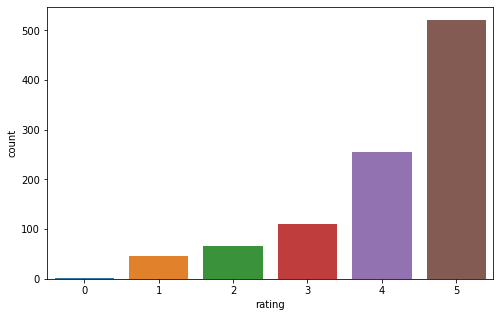

In [17]:
#What's the rating distribution among all users
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize = (8,5))
sns.countplot(rating_df['rating'])

In [18]:
#Amount of bakeries that sells different types of bread
bakery_df['types_of_bread'].value_counts()

Muffins         13
Croissants      10
Cakes           10
Swiss Rolls      9
Kringles         9
Tarts            9
Curry Puffs      9
Cupcakes         8
Cookies          8
Strudels         8
Sandwiches       7
Baos             7
Baked Pizzas     6
Doughnuts        6
Taiyakis         5
Bagels           3
Pies             2
E-Clairs         1
Name: types_of_bread, dtype: int64

In [19]:
#Amount of missing values in rating_df
rating_df.isnull().sum().sum()

0

In [20]:
#Amount of missing values in visited_df
bakery_df.isnull().sum().sum()

0

In [21]:
#Performing feature extraction #1 on bakeries.location.csv
bakery_df1 = bakery_df[['placeID','name','types_of_bread']]

In [23]:
#Performing feature extraction #2 on bakeries.location.csv
bakery_df2 = pd.read_csv('C:/Users/ryant/IT3100 Project 2/dataset_ai/bakeries_location.csv', index_col='placeID')

# **Section 3 – Model Training and Experiments**
- ***Explain your choice for the Machine Learning / Deep Learning model*** 
  >- **Low Rank Matrix Factorization** for multiplying user features and product features. This is pretty tedious to come up with, so I took reference from a BlackBoard link that provides some guides and steps in creating a rating-based model. 
  https://www.linkedin.com/learning/machine-learning-and-ai-foundations-recommendations/welcome?u=42278049
  >- **Singular Value Decomposition (SVD)** for multiplying user features and product features. It is almost the same as Normal Matrix Factorization, but it doesn't include any hyper-parameters that can tune.


- ***Include the codes to conduct your experiment(s) and choose the appropriate metrics to see if your model is performing well on the training & validation datasets.***
>- Success metrics for Collaborative Filtering include 
    - Root Mean Square Error **(RMSE)**
- ***Make sure that your experiment outputs remain visible in your Notebook submission***

### **Section 3.1- Training/Evaluating Low Rank Matrix Factorization for Ratings-Based Recommendation System**
  > For the Low Rank Matrix Factorization model, it uses number of features and regularization amount for hyper-parameters that can be fine-tuned, then multiplies user features and bakery features together to provide a simple ratings-based recommendation system that filters based on similar bakeries and based on user ratings.

Reasons to choose Low Rank Matrix Factorization
- Quick calculation time
- Able to fine-tune model with given hyper-parameters to improve accuracy
- Simple algorithm – to interpret 



> For the following cell blocks, it will convert user ratings into a matrix form that is going to be used for training.

In [24]:
# Create a web page view of the data for easy viewing
html = rating_df[0:100].to_html()

# Save the html to a temporary file
with open("data.html", "w") as f:
    f.write(html)

# Open the web page in our web browser
full_filename = os.path.abspath("data.html")
webbrowser.open("file://{}".format(full_filename))


True

In [25]:
# Convert the running list of user ratings into a matrix using the 'pivot table' function
ratings_df = pd.pivot_table(rating_df, index='userID', columns='placeID', aggfunc=np.max).fillna(0)

# Create a web page view of the data for easy viewing
html = ratings_df.to_html(na_rep="")

# Save the html to a temporary file
with open("review_matrix.html", "w") as f:
    f.write(html)

# Open the web page in our web browser
full_filename = os.path.abspath("review_matrix.html")
webbrowser.open("file://{}".format(full_filename))

True

In [26]:
# Convert the running list of user ratings into a matrix using the 'pivot table' function
ratings_df = pd.pivot_table(rating_df, index='userID', columns='placeID', aggfunc=np.max).fillna(0)

# Create a csv file of the data for easy viewing
ratings_df.to_csv("review_matrix.csv", na_rep="")

> For this cell block, it creates multiple functions which includes the Low Rank Matrix Factorization and RMSE.

In [27]:
def normalize_ratings(ratings):
    """
    Given an array of user ratings, subtract the mean of each product's ratings
    :param ratings: 2d array of user ratings
    :return: (normalized ratings array, the calculated means)
    """
    mean_ratings = np.nanmean(ratings, axis=0)
    return ratings - mean_ratings, mean_ratings


def cost(X, *args):
    """
    Cost function for low rank matrix factorization
    :param X: The matrices being factored (P and Q) rolled up as a contiguous array
    :param args: Array containing (num_users, num_products, num_features, ratings, mask, regularization_amount)
    :return: The cost with the current P and Q matrices
    """
    num_users, num_products, num_features, ratings, mask, regularization_amount = args

    # Unroll P and Q
    P = X[0:(num_users * num_features)].reshape(num_users, num_features)
    Q = X[(num_users * num_features):].reshape(num_products, num_features)
    Q = Q.T

    # Calculate current cost
    return (np.sum(np.square(mask * (np.dot(P, Q) - ratings))) / 2) + ((regularization_amount / 2.0) * np.sum(np.square(Q.T))) + ((regularization_amount / 2.0) * np.sum(np.square(P)))

def gradient(X, *args):
    """
    Calculate the cost gradients with the current P and Q.
    :param X: The matrices being factored (P and Q) rolled up as a contiguous array
    :param args: Array containing (num_users, num_products, num_features, ratings, mask, regularization_amount)
    :return: The gradient with the current X
    """
    num_users, num_products, num_features, ratings, mask, regularization_amount = args

    # Unroll P and Q
    P = X[0:(num_users * num_features)].reshape(num_users, num_features)
    Q = X[(num_users * num_features):].reshape(num_products, num_features)
    Q = Q.T

    # Calculate the current gradients for both P and Q
    P_grad = np.dot((mask * (np.dot(P, Q) - ratings)), Q.T) + (regularization_amount * P)
    Q_grad = np.dot((mask * (np.dot(P, Q) - ratings)).T, P) + (regularization_amount * Q.T)

    # Return the gradients as one rolled-up array as expected by fmin_cg
    return np.append(P_grad.ravel(), Q_grad.ravel())

def low_rank_matrix_factorization(ratings, mask=None, num_features=18, regularization_amount=0.01):
    """
    Factor a ratings array into two latent feature arrays (user features and product features)

    :param ratings: Matrix with user ratings to factor
    :param mask: A binary mask of which ratings are present in the ratings array to factor
    :param num_features: Number of latent features to generate for users and products
    :param regularization_amount: How much regularization to apply
    :return: (P, Q) - the factored latent feature arrays
    """
    num_users, num_products = ratings.shape

    # If no mask is provided, consider all 'NaN' elements as missing and create a mask.
    if mask is None:
        mask = np.invert(np.isnan(ratings))

    # Replace NaN values with zero
    ratings = np.nan_to_num(ratings)

    # Create P and Q and fill with random numbers to start
    np.random.seed(0)
    P = np.random.randn(num_users, num_features)
    Q = np.random.randn(num_products, num_features)

    # Roll up P and Q into a contiguous array as fmin_cg expects
    initial = np.append(P.ravel(), Q.ravel())

    # Create an args array as fmin_cg expects
    args = (num_users, num_products, num_features, ratings, mask, regularization_amount)

    # Call fmin_cg to minimize the cost function and this find the best values for P and Q
    X = fmin_cg(cost, initial, fprime=gradient, args=args, maxiter=3000)

    # Unroll the new P and new Q arrays out of the contiguous array returned by fmin_cg
    nP = X[0:(num_users * num_features)].reshape(num_users, num_features)
    nQ = X[(num_users * num_features):].reshape(num_products, num_features)

    return nP, nQ.T


def RMSE(real, predicted):
    """
    Calculate the root mean squared error between a matrix of real ratings and predicted ratings
    :param real: A matrix containing the real ratings (with 'NaN' for any missing elements)
    :param predicted: A matrix of predictions
    :return: The RMSE as a float
    """
    return np.sqrt(np.nanmean(np.square(real - predicted)))

> After creating the above functions, we are able to call the functions, especially the Low Rank Matrix Factorization function, to perform our training.

In [28]:
# Convert the running list of user ratings into a matrix
ratings_df = pd.pivot_table(rating_df, index='userID', columns='placeID', aggfunc=np.max).fillna(0)

# Apply matrix factorization to find the latent features
U, M = low_rank_matrix_factorization(ratings_df.values,
       num_features=1,
       regularization_amount=0.01)

# Find all predicted ratings by multiplying the U by M
predicted_ratings = np.matmul(U, M)

# Save all the ratings to a csv file
predicted_ratings_df = pd.DataFrame(index=ratings_df.index,
                                    columns=ratings_df.columns,
                                    data=predicted_ratings)
predicted_ratings_df.to_csv("predicted_ratings.csv")


Optimization terminated successfully.
         Current function value: 8063.151412
         Iterations: 182
         Function evaluations: 317
         Gradient evaluations: 317


In [29]:
# Convert the running list of user ratings into a matrix
ratings_df = pd.pivot_table(rating_df, index='userID', columns='placeID', aggfunc=np.max)

# Apply matrix factorization to find the latent features
U, M = low_rank_matrix_factorization(ratings_df.values,
                                     num_features=18,
                                     regularization_amount=0.01)

# Swap the rows and columns of product_features just so it's easier to work with
M = np.transpose(M)

# Choose a bakery to find similar bakeries to. Let's find bakery similar to bakery_id #129:
bakery_id = 129

# Get bakery_id #129's name and type of bread they sell
bakery_information = bakery_df1.iloc[bakery_id]

print("We are finding bakeries simi lar to this bakery:")
print("Bakery Name: {}".format(bakery_information.name))
print("Types of bread sold: {}".format(bakery_information.types_of_bread))

# Get the features for bakery_id #129 we found via matrix factorization
current_bakery_features = M[bakery_id - 1]

print("The attributes for this bakery are:")
print(current_bakery_features)

# The main logic for finding similar movies:

# 1. Subtract the current bakery's features from every other bakery's features
difference = M - current_bakery_features

# 2. Take the absolute value of that difference (so all numbers are positive)
absolute_difference = np.abs(difference)

# 3. Each bakery has 18 features. Sum those 18 features to get a total 'difference score' for each bakery
total_difference = np.sum(absolute_difference, axis=1)

# 4. Create a new column in the bakery list with the difference score for each bakery
bakery_df1['difference_score'] = total_difference

# 5. Sort the bakery list by difference score, from least different to most different
sorted_bakery_list = bakery_df1.sort_values('difference_score')

# 6. Print the result, showing the 5 most similar bakeries to bakery_id #129
print("The five most similar bakeries are:")
print(sorted_bakery_list[['name','types_of_bread', 'difference_score']][0:5])

         Current function value: 7.243274
         Iterations: 3000
         Function evaluations: 4513
         Gradient evaluations: 4513
We are finding bakeries simi lar to this bakery:
Bakery Name: 129
Types of bread sold: Pies
The attributes for this bakery are:
[-0.13062574  0.17568354  1.11860237 -0.49910325  0.1981651  -0.34950016
 -0.88907546 -0.29170962 -1.06278798  0.99568884  0.25944475 -0.05501121
  0.4586749   0.1095341  -0.43058347 -0.29420098  0.45343543 -0.77776979]
The five most similar bakeries are:
                            name types_of_bread  difference_score
128  Restaurant Bar Coty y Pablo       Strudels          0.000000
0                Kiku Cuernavaca         Bagels          4.213110
107                      Log Yin    Swiss Rolls          4.359600
24                     Giovannis     Sandwiches          4.412562
48                          Vips          Cakes          4.941174


<ipython-input-29-bb2877d8d312>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bakery_df1['difference_score'] = total_difference


In [31]:
# Convert the running list of user ratings into a matrix
ratings_df = pd.pivot_table(rating_df, index='userID', columns='placeID', aggfunc=np.max).fillna(0)

# Apply matrix factorization to find the latent features
U, M = low_rank_matrix_factorization(ratings_df.values,
       num_features=18,
       regularization_amount=0.01)

print("Enter a user_id to get recommendations (Between 1 and 150):")
user_id_to_search = int(input())

print("Bakeries previously reviewed by user_id {}:".format(user_id_to_search))

reviewed_bakery_df = rating_df[rating_df['userID'] == user_id_to_search]
reviewed_bakery_df = reviewed_bakery_df.join(bakery_df2, on='placeID')

print(reviewed_bakery_df[['name', 'types_of_bread', 'rating']])

input("Press enter to continue.")

print("Movies we will recommend:")

user_ratings = predicted_ratings[user_id_to_search - 1]
bakery_df2['rating'] = user_ratings

already_reviewed = reviewed_bakery_df['placeID']
recommended_df = bakery_df2[bakery_df2.index.isin(already_reviewed) == False]
recommended_df = recommended_df.sort_values(by=['rating'], ascending=False)

print(recommended_df[['name', 'types_of_bread', 'rating']].head(5))

Optimization terminated successfully.
         Current function value: 4092.856670
         Iterations: 818
         Function evaluations: 1220
         Gradient evaluations: 1220
Enter a user_id to get recommendations (Between 1 and 150):
34
Bakeries previously reviewed by user_id 34:
                                     name types_of_bread  rating
230           Restaurant Oriental Express         Bagels       5
231                Restaurante la Cantina        Cookies       5
232      Restaurante y Pescaderia Tampico       Kringles       5
233                        Restaurante 75        Cookies       5
234                    Restaurante Guerra    Curry Puffs       5
235  Swiss Rolls y Restaurant El Pacifico       Cupcakes       3
236                               El Club      Doughnuts       4
Press enter to continue.
Movies we will recommend:
                           name types_of_bread    rating
placeID                                                 
122      Tortas Locas Hipoca

> Based on the results and testing different placeIDs and userIDs, it does not look really good, with bakeries selling Pies not recommending other bakeries that sells Pies as well. And even though userID 45 gave a bakery that sells curry puffs a 5, it does not seem to recommend other bakeries that sells curry puffs as well. Either way, we will move on to calculating the RMSE. 

> For calculating the RMSE, we will need to split the ratings data into 3 different datasets: train, test and validation. Since it will not accept incompatible shapes later in the model, I have set to have all the same shapes for the 3 datasets that we are going to be splitting. However, these training and test datasets that was splitted up will be used for calculating the RMSE later on for the first experiment model , and not for training the model.  

In [32]:
# Splitting up the dataset 
from sklearn.model_selection import train_test_split
train, test_and_validate= train_test_split(rating_df,test_size=0.50,random_state=42)

In [33]:
test , validate= train_test_split(rating_df,test_size=0.50,random_state=42)

In [34]:
print(train.shape)
print(test.shape)
print(validate.shape)

(499, 3)
(499, 3)
(500, 3)


In [35]:
train.head()

,userID,placeID,rating
395,58,106,3
675,100,130,1
792,121,38,5
959,144,15,1
734,110,93,5


In [36]:
train.to_csv("bakery_ratings_data_set_training.csv")
test.to_csv("bakery_ratings_data_set_test.csv")
validate.to_csv("bakery_ratings_data_set_validate.csv")

In [37]:
# Load user ratings
raw_training_dataset_df = pd.read_csv('bakery_ratings_data_set_training.csv')
raw_testing_dataset_df = pd.read_csv('bakery_ratings_data_set_test.csv')
raw_validate_dataset_df = pd.read_csv('bakery_ratings_data_set_test.csv')

# Convert the running list of user ratings into a matrix
ratings_training_df = pd.pivot_table(raw_training_dataset_df, index='userID', columns='placeID', aggfunc=np.max)
ratings_testing_df = pd.pivot_table(raw_testing_dataset_df, index='userID', columns='placeID', aggfunc=np.max)
ratings_validate_df = pd.pivot_table(raw_validate_dataset_df, index='userID', columns='placeID', aggfunc=np.max)

# Apply matrix factorization to find the latent features
U, M = low_rank_matrix_factorization(ratings_training_df.values,
                                     num_features=18,
                                    regularization_amount=0.01)

# Find all predicted ratings by multiplying U and M
predicted_ratings = np.matmul(U, M)

# Measure RMSE
rmse_training = RMSE(ratings_training_df.values,
                     predicted_ratings)
rmse_testing = RMSE(predicted_ratings,
                    ratings_testing_df.values)
rmse_validate = RMSE(ratings_validate_df.values,
                    predicted_ratings)

print("Training RMSE: {}".format(rmse_training))
print("Testing RMSE: {}".format(rmse_testing))
print("Validate RMSE: {}".format(rmse_validate))



         Current function value: 967.090243
         Iterations: 3000
         Function evaluations: 4518
         Gradient evaluations: 4518
Training RMSE: 0.009117724843958085
Testing RMSE: 0.009117724843958085
Validate RMSE: 0.009117724843958085


> **NOTE:**Looking at the RMSE, it is pretty weird. Although it has a very low training RMSE of 0.013677065676726384, the testing RMSE and the Validate RMSE is the same as well, which is not supposed to happen! After debugging the model for close to 5 hours, it still leads to the same results. Thus, it shows that this Low Rank Matrix Factorization model is a complete failure. But since all RMSEs are the same, I take it as the RMSE of the whole model is 0.013677065676726384. 

> Even though it's a complete failure, I wanted to save the model into the data files, so that it can retrieve recommendations in an instant, without having to read the CSV files over and over again.

In [38]:
import pickle

# Load userprofile_ratings.csv
raw_dataset_df = pd.read_csv('C:/Users/ryant/IT3100 Project 2/dataset_ai/userprofile_ratings.csv')

# Convert the running list of user ratings into a matrix
ratings_df = pd.pivot_table(raw_dataset_df, index='userID', columns='placeID', aggfunc=np.max)

# Normalize the ratings (center them around their mean)
normalized_ratings, means = normalize_ratings(ratings_df.values)

# Apply matrix factorization to find the latent features
U, M = low_rank_matrix_factorization(normalized_ratings,
                                      num_features=18,
                                      regularization_amount=0.1)

# Find all predicted ratings by multiplying U and M
predicted_ratings = np.matmul(U, M)

# Add back in the mean ratings for each product to de-normalize the predicted results
predicted_ratings = predicted_ratings + means

# Save features and predicted ratings to files for later use
pickle.dump(U, open("user_features.dat", "wb"))
pickle.dump(M, open("product_features.dat", "wb"))
pickle.dump(predicted_ratings, open("predicted_ratings.dat", "wb" ))
pickle.dump(means, open("means.dat", "wb" ))


Optimization terminated successfully.
         Current function value: 23.252241
         Iterations: 2872
         Function evaluations: 4307
         Gradient evaluations: 4307


In [39]:
# Load prediction rules from data files
means = pickle.load(open("means.dat", "rb"))

# Just use the average bakery ratings directly as the user's predicted ratings
user_ratings = means

print("Bakeries  we will recommend:")

bakery_df2['rating'] = user_ratings
bakery_df2 = bakery_df2.sort_values(by=['rating'], ascending=False)

print(bakery_df2[['name', 'types_of_bread', 'rating']].head(5))

Bakeries  we will recommend:
                       name types_of_bread  rating
placeID                                           
84             tortas hawai        Cookies     5.0
28               cafe ambar          Cakes     5.0
128               Paniroles    Swiss Rolls     5.0
77       TACOS CORRECAMINOS       Cupcakes     5.0
90       Gorditas Dona Tota       Kringles     5.0


In [41]:
# Load prediction rules from data files
U = pickle.load(open("user_features.dat", "rb"))
M = pickle.load(open("product_features.dat", "rb"))
predicted_ratings = pickle.load(open("predicted_ratings.dat", "rb"))

#Recommending bakeries based on the user's ratings
print("Enter a user_id to get recommendations (Between 1 and 100):")
user_id_to_search = int(input())

print("Bakeries we will recommend:")

user_ratings = predicted_ratings[user_id_to_search - 1]
bakery_df1['rating'] = user_ratings
bakery_df1 = bakery_df1.sort_values(by=['rating'], ascending=False)

print(bakery_df1[['name', 'types_of_bread', 'rating']].head(5))

Enter a user_id to get recommendations (Between 1 and 100):
67
Bakeries we will recommend:
                               name types_of_bread    rating
74   Restaurante Casa de las Flores     Sandwiches  5.397742
92                     Cafe Chaires   Baked Pizzas  5.306172
110                        crudalia        Muffins  5.277906
49            Restaurante Alhondiga          Tarts  5.199095
86    Carreton de Flautas y Migadas    Curry Puffs  5.187564


<ipython-input-41-d1ed26e654e8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bakery_df1['rating'] = user_ratings


In [43]:
# Load prediction rules from data files
M = pickle.load(open("product_features.dat", "rb"))

# Swap the rows and columns of product_features just so it's easier to work with
M = np.transpose(M)

# Choose a movie to find similar movies to. Let's find movies similar to movie #5:
bakery_id = 5

# Get bakery_id #5's name and genre
bakery_information = bakery_df2.loc[bakery_id]

print("We are finding bakeries similar to this bakery:")
print("Bakery Name: {}".format(bakery_information.name))
print("Types of Bread Sold: {}".format(bakery_information.types_of_bread))

# Get the features for bakery_id #5 we found via matrix factorization
current_bakery_features = M[bakery_id - 1]

print("The attributes for this movie are:")
print(current_bakery_features)

# The main logic for finding similar bakeries:

# 1. Subtract the current bakery's features from every other bakery's features
difference = M - current_bakery_features

# 2. Take the absolute value of that difference (so all numbers are positive)
absolute_difference = np.abs(difference)

# 3. Each bakery has several features. Sum those features to get a total 'difference score' for each bakery
total_difference = np.sum(absolute_difference, axis=1)

# 4. Create a new column in the bakery list with the difference score for each bakery
bakery_df2['difference_score'] = total_difference

# 5. Sort the bakery list by difference score, from least different to most different
sorted_bakery_list = bakery_df2.sort_values('difference_score')

# 6. Print the result, showing the 5 most similar bakeries to bakery_id #5
print("The five most similar bakeries are:")
print(sorted_bakery_list[['name', 'types_of_bread', 'difference_score']][0:5])

We are finding bakeries similar to this bakery:
Bakery Name: 5
Types of Bread Sold: Baos
The attributes for this movie are:
[ 0.01055931 -0.14053824  0.69340141 -0.14160529 -0.15545172  0.41862717
 -0.31528417 -0.13795819 -0.35435253 -0.1451756   0.46387157 -0.10923334
  0.33824655  0.47463579  0.03076818 -0.31470129  0.14067145  0.17602568]
The five most similar bakeries are:
                            name types_of_bread  difference_score
placeID                                                          
90            Gorditas Dona Tota       Kringles          0.000000
29       Restaurante la Gran Via   Baked Pizzas          3.554003
17                       Sirlone         Bagels          3.686113
11                Restaurante 75        Cookies          3.767854
19                 Unicols Pizza     Croissants          4.007702


>Based on this Low Rank Matrix Factorization model, it failed to give correct recommendations to users based on their ratings of different bakeries.

### **Section 3.2- Training/Evaluating SVD for Ratings-Based Recommendation System**

>For the SVD model, I wanted to try a different collaborative-filtering model, that involves a Singular Value Decomposition (SVD) model, that also uses matrix factorization , but produces singular vectors and singular values to provide recommendations based on user ratings only. 


Reasons to choose SVD
- Quick calculation time
- Simple algorithm – to interpret 
- Higher accuracy 
- Works better than the Low Rank Matrix Factorization model

>  The following cell blocks will pivot the user ratings into a matrix form that is going to be used for training the SVD model.

In [44]:
#Transform the data into a pivot table for training
pivot_data = rating_df.pivot_table(index = 'userID', columns = 'placeID', values = 'rating').fillna(0)
pivot_data.shape

(150, 130)

In [45]:
pivot_data.head()

placeID,1,2,3,4,5,6,7,8,9,10,...,121,122,123,124,125,126,127,128,129,130
userID,,,,,,,,,,,,,,,,,,,,,
1,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0


In [46]:
#Create a user_index column to count the no. of users -> Change naming convention of user by using counter
pivot_data['user_index'] = np.arange(0, pivot_data.shape[0],1)
pivot_data.head()

placeID,1,2,3,4,5,6,7,8,9,10,...,122,123,124,125,126,127,128,129,130,user_index
userID,,,,,,,,,,,,,,,,,,,,,
1,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
5,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,...,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4


In [47]:
pivot_data.set_index(['user_index'], inplace = True)
pivot_data.head()

placeID,1,2,3,4,5,6,7,8,9,10,...,121,122,123,124,125,126,127,128,129,130
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0


> This next cell block involves importing the SVD model from SciPy and feeding the pivoted data into the model.

In [48]:
#Applying SVD method on a large sparse matrix, to predict ratings for all resto that weren't rated by a user

from scipy.sparse.linalg import svds

#SVD
U,s, VT = svds(pivot_data, k = 10)

#Construct diagonal array in SVD
sigma = np.diag(s)

#Applying SVD would output 3 parameters namely
print("U = ",U) #Orthogonal matrix
print('************************************************')
print("S = ",s) #Singular values
print('************************************************')
print("VT = ", VT) #Transpose of Orthogonal matrix

U =  [[ 0.11208066  0.00357439  0.11644926 ... -0.00368808  0.02685263
  -0.10294641]
 [-0.04931624  0.06806939  0.21482191 ... -0.00247915 -0.00058921
  -0.00046884]
 [-0.03796138  0.05548978  0.1754966  ... -0.00163375  0.00045104
  -0.0011805 ]
 ...
 [ 0.03979567  0.10085645  0.00477352 ... -0.01923895 -0.00660949
  -0.05328707]
 [-0.04629106  0.01044035  0.00510177 ...  0.01668328  0.04359107
  -0.0257342 ]
 [ 0.00308378 -0.00902607  0.00510893 ... -0.01230067  0.01714347
  -0.01296043]]
************************************************
S =  [20.85471165 21.6224788  21.97223871 22.43547553 23.0011824  23.99318653
 24.20905035 25.06892899 29.72895055 43.17758806]
************************************************
VT =  [[-0.0056128   0.08194205  0.09680959 ... -0.00873917 -0.04466289
   0.01961769]
 [-0.01161486 -0.26435566  0.01682209 ...  0.00678702 -0.02234094
   0.00839103]
 [-0.04070773  0.05998891 -0.03708195 ... -0.08854855 -0.12762066
   0.02422868]
 ...
 [-0.00124423  0.138065

In [49]:
#Predict ratings for all restaurants not rated by a user using SVD
all_user_predicted_ratings = np.dot(np.dot(U,sigma), VT)

#Predicted ratings
pred_data = pd.DataFrame(all_user_predicted_ratings, columns = pivot_data.columns)
pred_data.head()

placeID,1,2,3,4,5,6,7,8,9,10,...,121,122,123,124,125,126,127,128,129,130
0,-0.043081,2.155563,0.872527,0.600396,0.617959,0.181291,0.403992,0.322743,0.565528,-0.089095,...,0.570049,2.476409,0.756242,0.107956,0.034096,-0.041560,0.165821,-0.020388,-0.163428,0.041704
1,-0.023251,0.171342,-0.058268,1.227234,1.310628,0.043857,0.837556,-0.082493,1.181473,-0.053545,...,0.070062,-0.017447,1.556980,0.214549,0.528055,0.002827,-0.003065,-0.078213,-0.020988,0.039097
2,-0.021969,0.175175,-0.023513,1.004221,1.071716,0.039534,0.685237,-0.063064,0.964903,-0.061276,...,0.064718,0.016204,1.272756,0.175572,0.421433,-0.000858,0.001001,-0.067526,-0.024388,0.027909
3,-0.035844,0.305391,-0.055736,1.825722,1.948724,0.068116,1.245755,-0.112586,1.756681,-0.093798,...,0.107737,0.024540,2.315634,0.319393,0.772986,-0.000040,-0.005707,-0.116921,-0.035956,0.055996
4,0.102620,0.144879,-0.107362,1.550339,1.672709,0.010716,1.058609,-0.094574,1.512399,-0.064912,...,-0.088919,-0.138501,1.969407,0.280807,0.904832,0.015128,0.024146,0.139233,0.359617,0.018870


For the next cell block, it takes the sorted user ratings and predicted ratings and put it in a new DataFrame, which also includes the recommended bakeries for each user.

In [50]:
#Recommend places with the highest predicted ratings

def recommend_places(userID, pivot_data, pred_data, num_recommendations):
    user_index  = userID-1 #index starts at 0

    sorted_user_ratings = pivot_data.iloc[user_index].sort_values(ascending = False) #sort user ratings

    sorted_user_predictions = pred_data.iloc[user_index].sort_values(ascending = False)#sorted_user_predictions
    

    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis = 1)
    temp.index.name = 'Recommended Places'
    temp['Bakery_Name']=bakery_df['name']
    temp['Types_bread']=bakery_df['types_of_bread']
    temp.columns = ['user_ratings', 'user_predictions','Bakery_Name','Types_bread']
    
    temp = temp.loc[temp.user_ratings == 0]
    temp = temp.sort_values('user_predictions', ascending = False)

    print('\n Below are the recommended places for user(user_id = {}):\n'. format(userID))
    print(temp.head(num_recommendations))

In [51]:
#Recommend places based on userID, past ratings, predicted ratings, num of places 

userid_input=int(input("Enter your UserID (from 1 to 150)"))

num_recommedations = 5
recommend_places(userid_input, pivot_data, pred_data, num_recommedations)

Enter your UserID (from 1 to 150)67

 Below are the recommended places for user(user_id = 67):

                    user_ratings  user_predictions  \
Recommended Places                                   
81                           0.0          1.354925   
63                           0.0          1.033869   
38                           0.0          0.976796   
102                          0.0          0.886654   
109                          0.0          0.820600   

                                              Bakery_Name Types_bread  
Recommended Places                                                     
81                                    el lechon potosino        Cakes  
63                                  Restaurante Versalles       Cakes  
38                                       Restaurant Teely       Tarts  
102                                         pizza clasica    Kringles  
109                 carnitas mata calle Emilio Portes Gil   Doughnuts  


> As seen from the results, it is indeed a better model than the previous Low Rank Matrix Factorization model, as user 1, who gave a bakery that sells Curry Puffs a 5 (placeID 87), is given another recommendation of bakery that also sells curry puffs (place 111). Apologies that we are not really able to show the bakery names as I implemented this output at last minute. 

>As the results are indeed better, it is wise to calculate the RMSE of this  SVD model. The following cell blocks takes the predicted ratings and the actual ratings to calculate the RMSE of the model. 

In [52]:
#Actual ratings given by the users
pivot_data.head()

#Average actual rating for each place

pivot_data.mean().head()

placeID
1    0.100000
2    0.766667
3    0.253333
4    0.080000
5    0.100000
dtype: float64

In [53]:
#Predicted ratings for a place
pred_data.head()

#Average predicted rating for each place
pred_data.mean().head()

placeID
1    0.050205
2    0.812548
3    0.241655
4    0.089394
5    0.100568
dtype: float64

In [54]:
#Showing the difference of actual ratings and predicted ratings
rmse_data = pd.concat([pivot_data.mean(), pred_data.mean()], axis = 1)
rmse_data.columns = ['Avg_actual_ratings','Avg_predicted_ratings']
print(rmse_data.shape)
rmse_data['place_index'] = np.arange(0, rmse_data.shape[0],1)
rmse_data.head()

(130, 2)


,Avg_actual_ratings,Avg_predicted_ratings,place_index
placeID,,,
1,0.100000,0.050205,0
2,0.766667,0.812548,1
3,0.253333,0.241655,2
4,0.080000,0.089394,3
5,0.100000,0.100568,4


In [55]:
#Calculating the RMSE

RMSE_train = round((((rmse_data.Avg_predicted_ratings - rmse_data.Avg_predicted_ratings) ** 2).mean() ** 0.5),5)
print('\n Training RMSE SVD Model = {}\n'.format(RMSE_train))

RMSE_test = round((((rmse_data.Avg_actual_ratings - rmse_data.Avg_predicted_ratings) ** 2).mean() ** 0.5),5)
print('\n Testing RMSE SVD Model = {}\n'.format(RMSE_test))



 Training RMSE SVD Model = 0.0


 Testing RMSE SVD Model = 0.03492



> **NOTE**: For the RMSE_train part, I have no clue whether to put it in, since RMSE_test already took the actual and predicted ratings and calculated it with a good RMSE score, so please feel free to correct it or even remove it if it is totally wrong.

>For the RMSE calculation, I did not split up the dataset into train, test and validate since for the RMSE testing part, it already takes the old actual ratings of users and compares it with the predicted ratings. And looking at it, not only does the RMSE makes sense, it has a pretty low RMSE for testing as well (0.03492) , which is pretty good.